# Used Cars Price Prediction
## Introduction

In this project, we will explore a dataset containing information about used cars, with the goal of predicting their prices. The dataset consists of one dependent variable (Price) and seven independent variables. With this dataset, we have the opportunity to perform various data cleaning and preprocessing tasks, as well as build predictive models to accurately estimate the prices of used cars.

-  *The dataset includes the following columns:*
    - **Price:** This is the target variable that we aim to predict. It represents the price of the used cars.
    - **Year:** The year in which the car was purchased.
    - **Mileage:** The number of kilometers driven by the car.
    - **City:** The city in which the car was sold.
    - **State:** The state in which the car was sold.
    - **Vin:** A unique identifier for each car.
    - **Make:** The manufacturer of the car.
    - **Model:** The specific model or name of the car.

- *Project Objectives:*

Our primary objective is to build predictive models that can accurately predict the prices of used cars based on the given independent variables. To achieve this objective, we will:

    - Perform exploratory data analysis (EDA) to gain insights into the distribution and relationships of the variables in the dataset.
    - Clean and preprocess the dataset by handling missing values, outliers, and categorical variables.
    - Engineer new features if necessary to improve model performance.
    - Select appropriate machine learning algorithms and techniques for modeling the data.
    - Train and evaluate multiple models to identify the best-performing one.
    - Fine-tune the selected model and validate its performance using suitable evaluation metrics.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("true_car_listings.csv")
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [20]:
df.duplicated().sum()

30

In [21]:
df = df[df.duplicated() == False]
df.duplicated().sum()

0

In [22]:
df.isna().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852092 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852092 non-null  int64 
 1   Year     852092 non-null  int64 
 2   Mileage  852092 non-null  int64 
 3   City     852092 non-null  object
 4   State    852092 non-null  object
 5   Vin      852092 non-null  object
 6   Make     852092 non-null  object
 7   Model    852092 non-null  object
dtypes: int64(3), object(5)
memory usage: 58.5+ MB


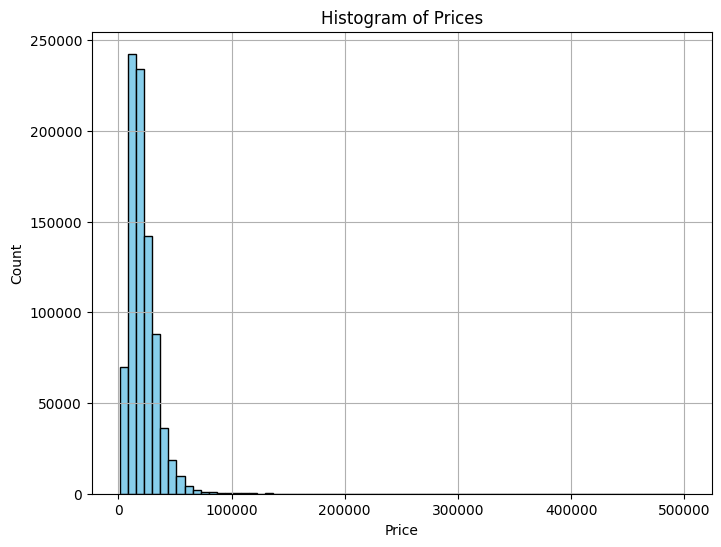

In [35]:
plt.figure(figsize=(8, 6)) 
plt.hist(df['Price'], bins=70, color='skyblue', edgecolor='black') 
plt.title('Histogram of Prices')  
plt.xlabel('Price') 
plt.ylabel('Count') 
plt.grid(True)  
plt.show()

The distribution of the `Price` column is **Right-Skewed**.

<AxesSubplot: xlabel='Make'>

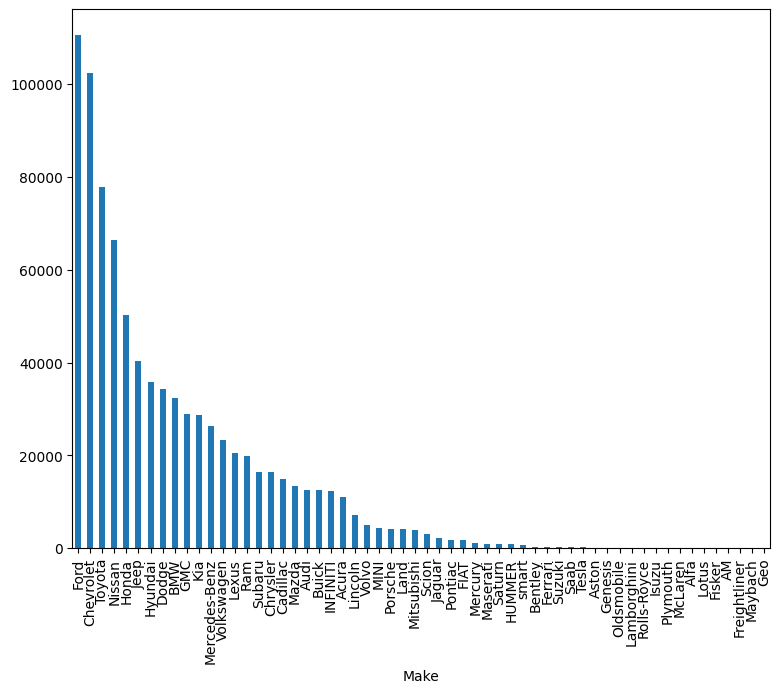

In [40]:
plt.figure(figsize=(9, 7)) 
df.Make.value_counts().plot(kind='bar')

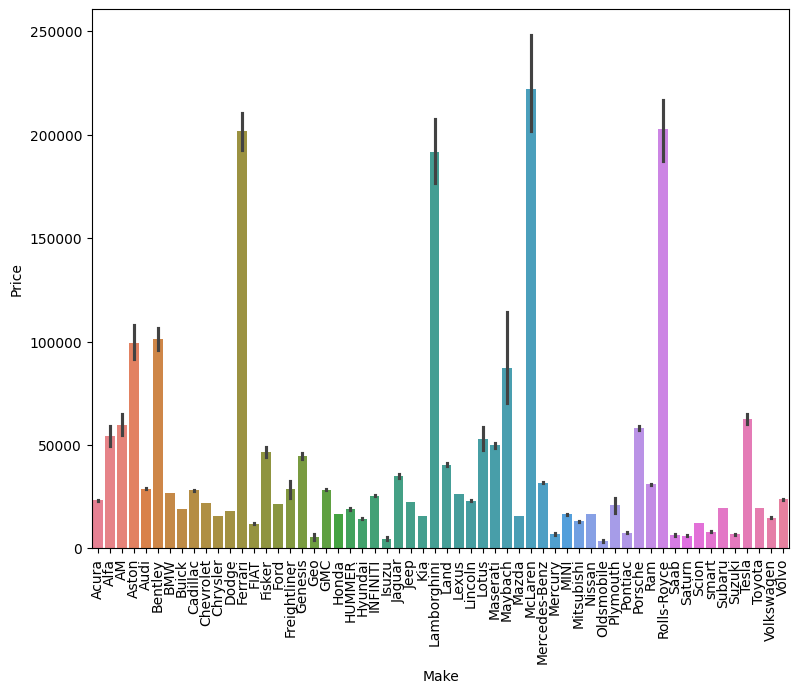

In [43]:
plt.figure(figsize=(9, 7)) 
sns.barplot(x = df['Make'], y = df['Price'],palette='husl')
plt.xticks(rotation='vertical')
plt.show()

In [129]:
df['Model'].value_counts().to_dict()

{'Silverado': 24929,
 'Grand': 17321,
 'Accord': 14502,
 'F-1504WD': 14177,
 'Altima2.5': 11288,
 'Civic': 11273,
 'Sierra': 11208,
 '3': 11131,
 'Wrangler': 7975,
 'Super': 7953,
 'Jetta': 7340,
 'Santa': 6708,
 'FusionSE': 6386,
 'EquinoxFWD': 6223,
 'Tundra': 5449,
 '5': 5348,
 'RX': 5327,
 'F-1502WD': 5144,
 'CamrySE': 4825,
 'FocusSedan': 4637,
 'Town': 4530,
 'MalibuLT': 4515,
 'ES': 4426,
 'EscapeFWD': 4243,
 'CorollaLE': 4172,
 'Rover': 4096,
 'Cooper': 4027,
 'Ram': 3990,
 'CamaroCoupe': 3879,
 'IS': 3708,
 'Camry4dr': 3648,
 'FocusHatchback': 3622,
 'SorentoLX': 3577,
 'RAV44X4': 3510,
 'EquinoxAWD': 3480,
 'Sonata2.4L': 3380,
 'OptimaLX': 3357,
 'Tacoma4WD': 3339,
 'ExplorerXLT': 3325,
 'Passat4dr': 3316,
 'Escape4WD': 3239,
 'RogueSV': 3204,
 'TerrainFWD': 3125,
 'Elantra4dr': 3104,
 'CruzeSedan': 2998,
 'Tacoma2WD': 2968,
 'Outback2.5i': 2931,
 'CR-VEX-L': 2857,
 'EdgeSEL': 2754,
 '200Limited': 2747,
 'CorollaS': 2729,
 'Mustang2dr': 2703,
 'AcadiaFWD': 2697,
 'Sonata4dr':

In [115]:
model_df = pd.DataFrame(df['Model'].value_counts().items(), columns=['Model', 'Count'])
model_df

,Model,Count
0,Silverado,24929
1,Grand,17321
2,Accord,14502
3,F-1504WD,14177
4,Altima2.5,11288
...,...,...
2731,EdgeLTD,1
2732,ExpeditionEddie,1
2733,EscortSE,1
2734,Ranger,1


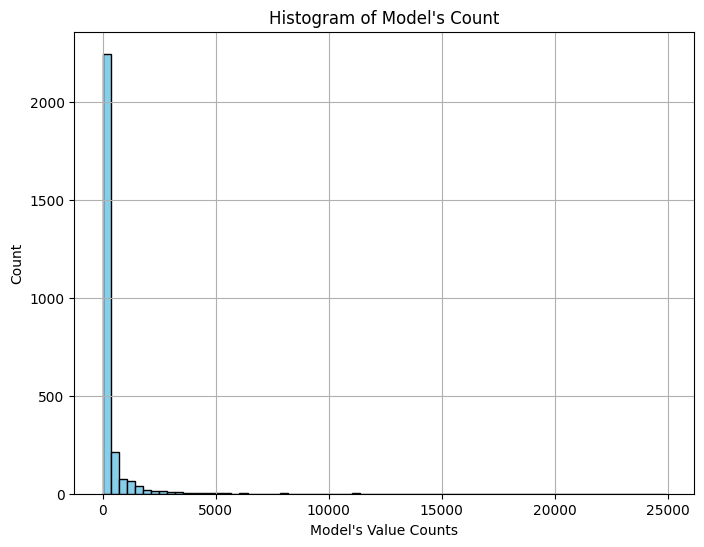

In [128]:
plt.figure(figsize=(8, 6)) 
plt.hist(model_df['Count'], bins=70, color='skyblue', edgecolor='black') 
plt.title('Histogram of Model\'s Count')  
plt.xlabel('Model\'s Value Counts') 
plt.ylabel('Count') 
plt.grid(True)  
plt.show()

<AxesSubplot: xlabel='Model'>

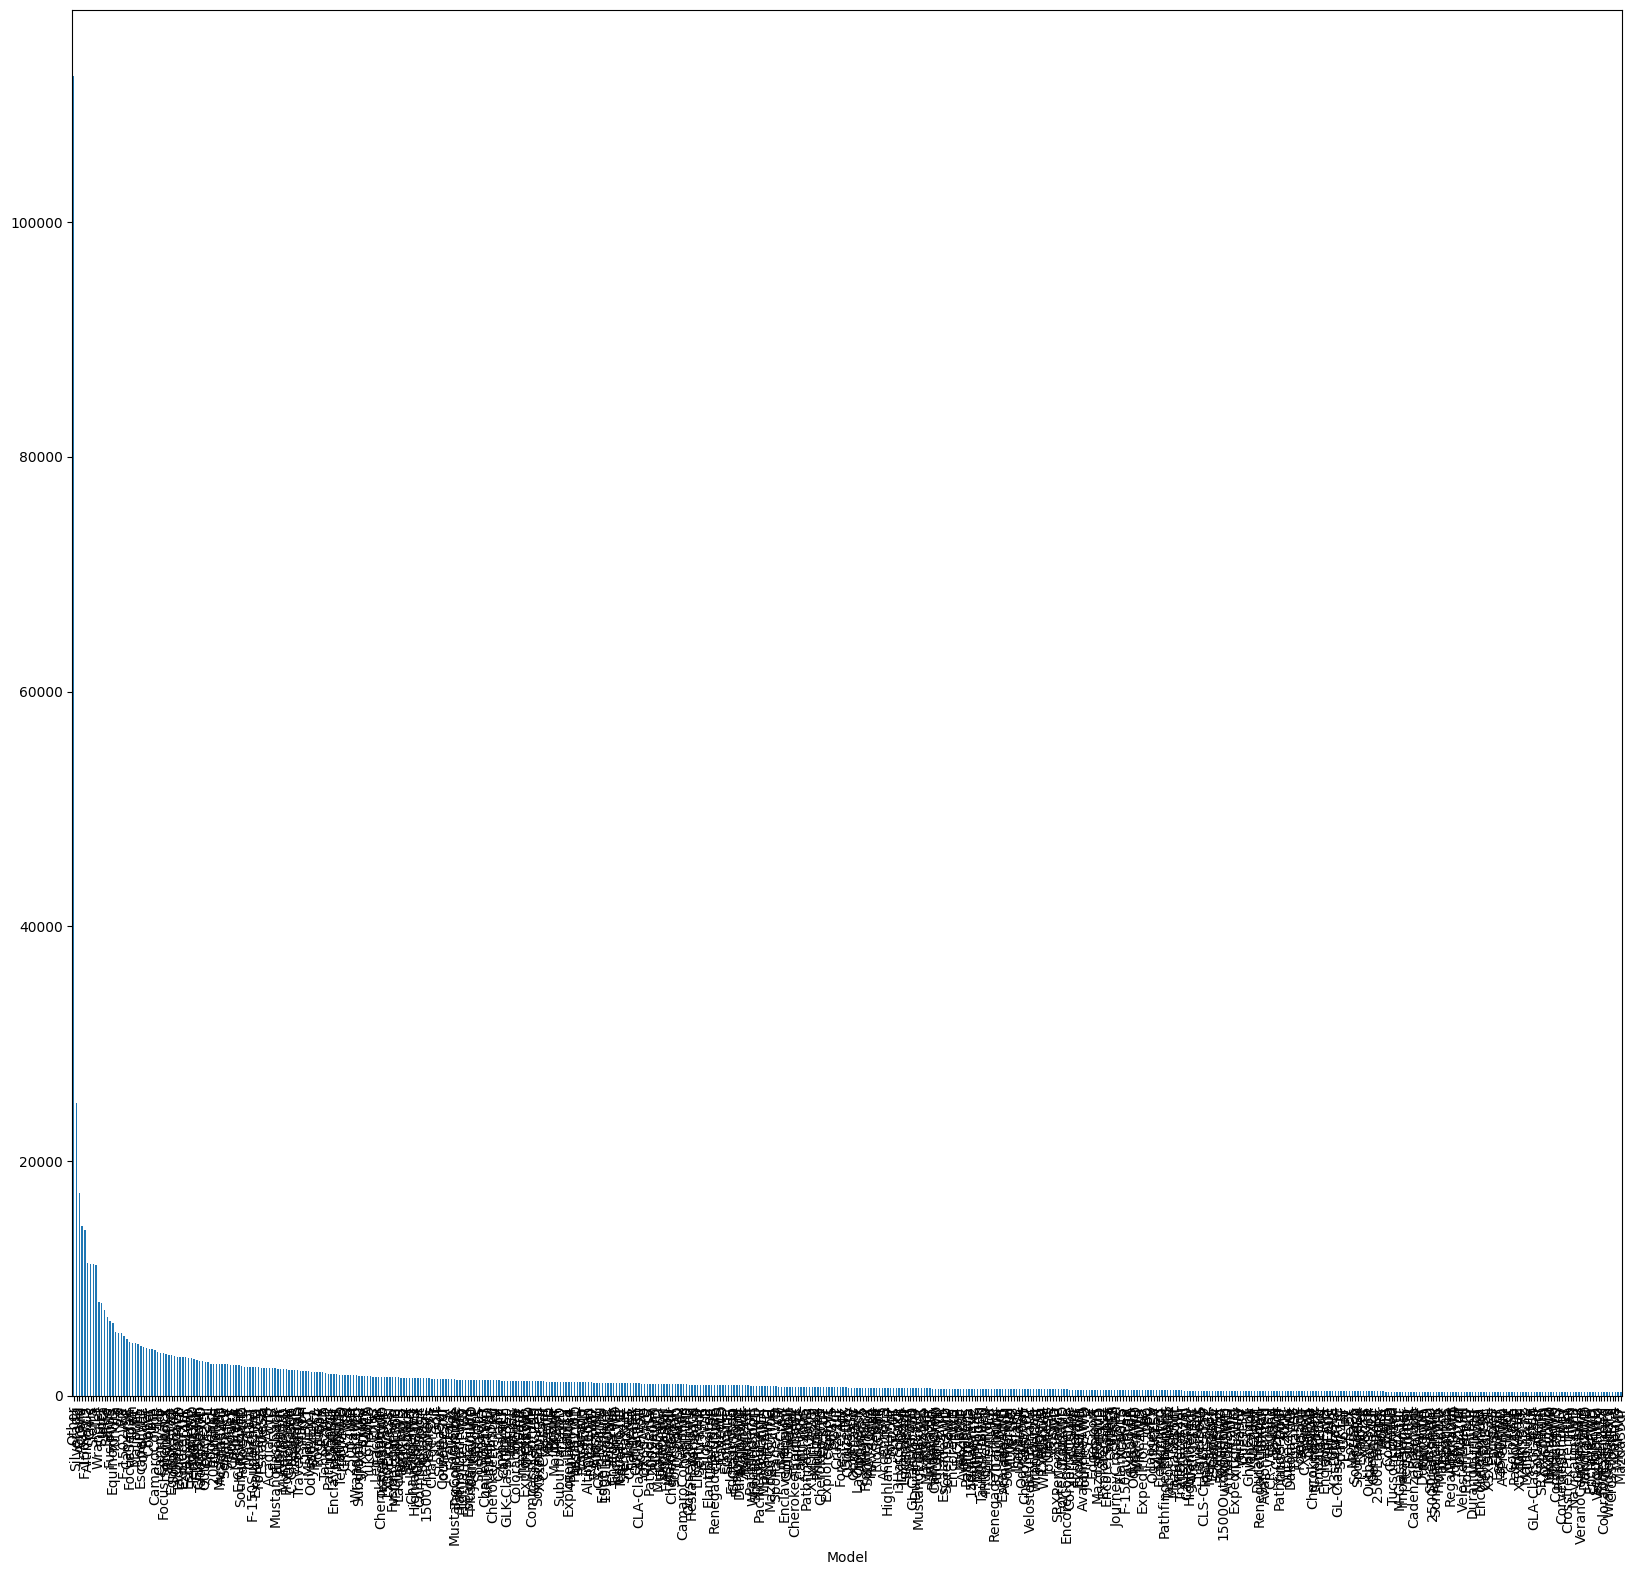

In [130]:
plt.figure(figsize=(20, 18)) 
model_dict = df['Model'].value_counts().to_dict()
pd.DataFrame(df['Model'].apply(lambda x: x if model_dict[x] >= 300 else 'Other'), columns=['Model']).Model.value_counts().plot(kind='bar')
# model_dict['Silverado']>=5000

In [50]:
plt.figure(figsize=(9, 7)) 
sns.barplot(x = df['Make'], y = df['Price'],palette='husl')
plt.xticks(rotation='vertical')
plt.show()

58

In [93]:
model_counts_df["Modified_Model"].value_counts()

Modified_Model
Other         2718
Jetta            1
F-1502WD         1
RX               1
5                1
Tundra           1
EquinoxFWD       1
FusionSE         1
Santa            1
Silverado        1
Grand            1
Wrangler         1
3                1
Sierra           1
Civic            1
Altima2.5        1
F-1504WD         1
Accord           1
Super            1
Name: count, dtype: int64